# Multilayer Perceptron
You should build an end-to-end machine learning pipeline using a multilayer perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) model.
- Optimize your pipeline by cross-validating your design decisions. 
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

### Import libraries

In [8]:
import pandas as pd
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### Import dataset

In [2]:
mnist_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/mnist.csv')
mnist_db = mnist_db.set_index('id')
mnist_db.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into training and testing set

In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(mnist_db)

x_train = df_train.drop('class', axis=1)
y_train = df_train['class']
x_test = df_test.drop('class', axis=1)
y_test = df_test['class']

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (3000, 784)
y_train (3000,)
x_test (1000, 784)
y_test (1000,)


### Train a MLP pipeline

Define a Grid

In [4]:
mlp_grid = {'hidden_layer_sizes' : [100, 120], 'activation': ['relu', 'logistic'], 'alpha': [0.0001, 0.001], 'learning_rate_init': [0.001, 0.01]}

Conduct the grid search

In [5]:
mlp_grid_object = sklearn.model_selection.GridSearchCV(MLPClassifier(), mlp_grid, cv=5, error_score='raise')

Fit the training model into the object

In [6]:
# Fit the training set into the grid
mlp_grid_object.fit(x_train, y_train)

/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adolfomytr/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

GridSearchCV(cv=5, error_score='raise', estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [100, 120],
                         'learning_rate_init': [0.001, 0.01]})

Evaluate best parameters

In [7]:
print('best_score MLP', mlp_grid_object.best_score_)
print('best_params MLP', mlp_grid_object.best_params_)
print('best_estimator MLP', mlp_grid_object.best_estimator_)

best_score MLP 0.9103333333333333
best_params MLP {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 120, 'learning_rate_init': 0.001}
best_estimator MLP MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=120)


### Evaluate model

In [9]:
# With accuracy
y_predicted = mlp_grid_object.predict(x_test)
accuracy = accuracy_score(y_test, y_predicted)
print('Accuracy', accuracy)

Accuracy 0.909


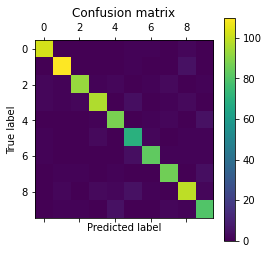

,0,1,2,3,4,5,6,7,8,9
0,103,0,0,0,0,1,1,0,2,0
1,0,110,0,0,0,1,0,0,5,0
2,2,1,93,1,2,0,1,3,0,1
3,2,1,2,97,0,4,0,1,3,0
4,0,0,0,1,88,0,1,2,0,5
5,1,0,0,3,0,70,2,0,1,1
6,1,0,0,0,0,4,83,1,1,1
7,0,1,1,0,1,0,0,86,0,4
8,0,2,0,3,2,5,1,0,99,2
9,0,1,1,0,5,0,0,2,1,80


In [10]:
# With Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(confusion_matrix(y_test, y_predicted))

In [11]:
# With precision, recall and f-score
class_report = classification_report(y_test, y_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.95      0.95      0.95       116
           2       0.96      0.89      0.93       104
           3       0.92      0.88      0.90       110
           4       0.90      0.91      0.90        97
           5       0.82      0.90      0.86        78
           6       0.93      0.91      0.92        91
           7       0.91      0.92      0.91        93
           8       0.88      0.87      0.88       114
           9       0.85      0.89      0.87        90

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

